In [1]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
import seaborn.objects as so
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(os.path.join('data','cleaned_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

/Users/eweisbar/Desktop/github/2024_Survey/utils.py:86: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('',inplace=True)


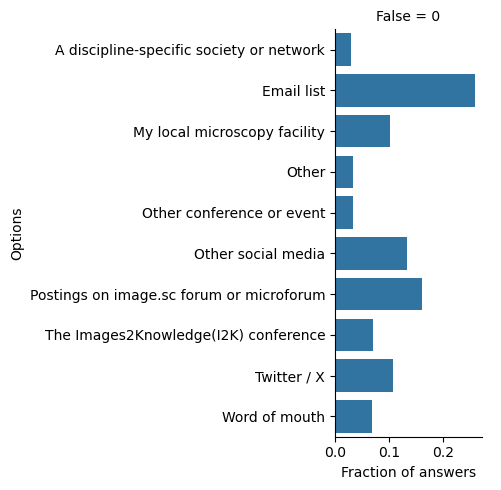

In [3]:
col = 'Where did you hear about this survey? Please select all that apply.'
utils.select_all_that_apply_hist_facet(data,col,os.path.join('figures','where_hear_survey.png'))

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


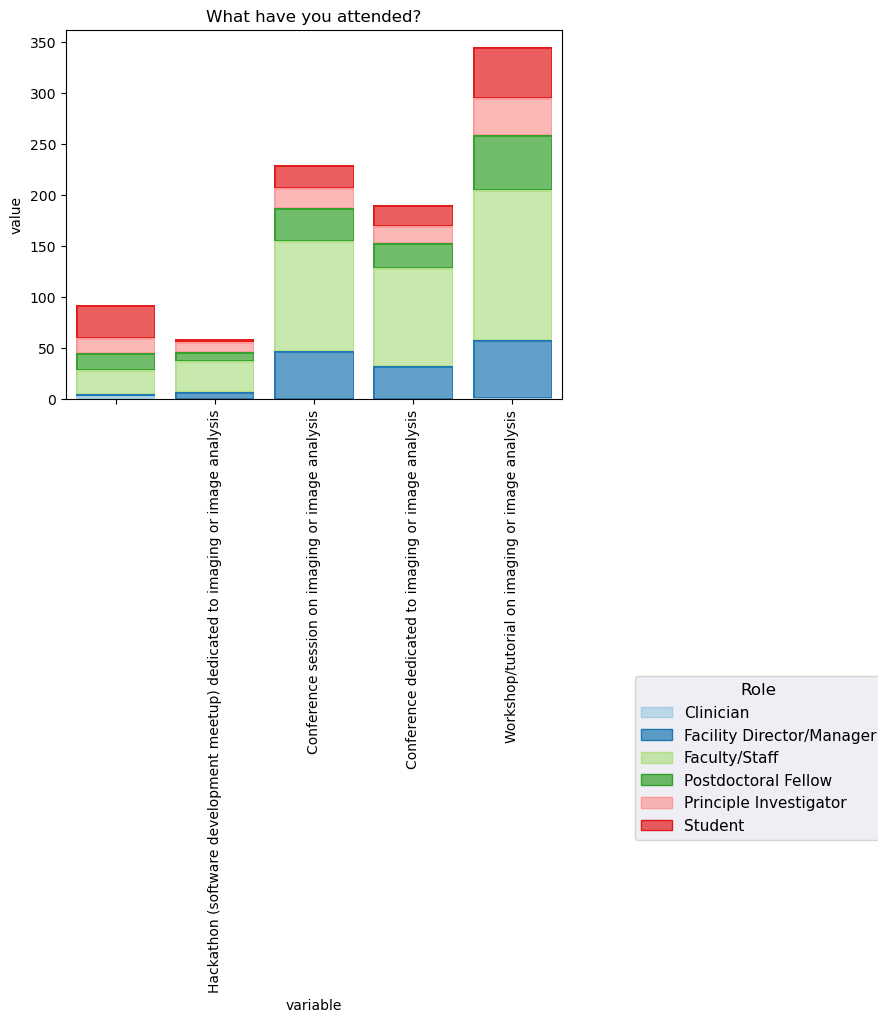

In [4]:
col = 'Please select any of the following you have attended in the past'
df = utils.make_counts_per_multiselect_group(data.dropna(subset=col),single_select_col='Single_Role',multi_select_col=col)
utils.plot_single_vs_multi(df, 
                           'Role',
                           os.path.join('figures','What_Attended_byRole.png'),
                            'What have you attended?',
                            groupbyfirstcol=False)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


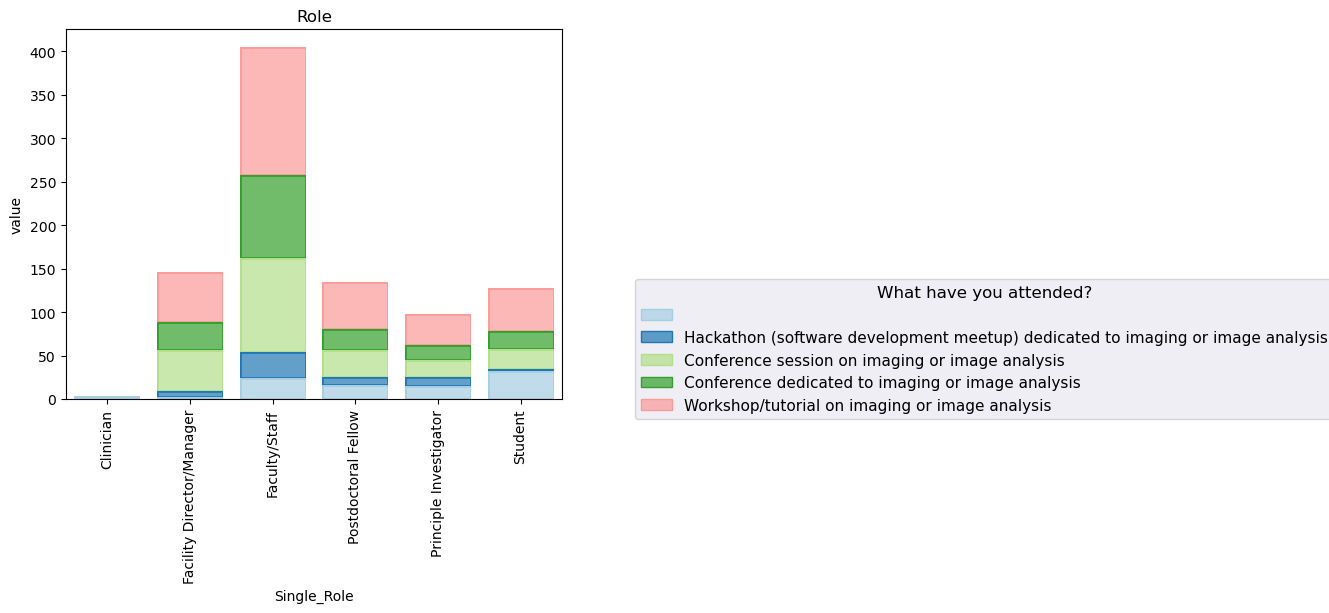

In [5]:
utils.plot_single_vs_multi(df, 
'What have you attended?',
                           os.path.join('figures','What_Attended_byType.png'),
                            'Role',
                            groupbyfirstcol=True)

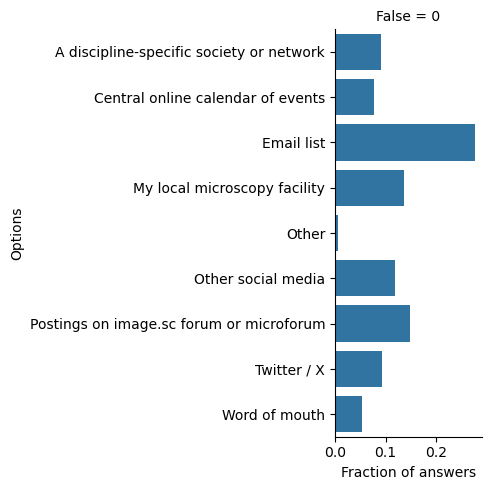

In [6]:
col = 'How would you most prefer to be notified about image analysis workshops, sessions, or conferences being planned?'
utils.select_all_that_apply_hist_facet(data,col,os.path.join('figures','How_prefer_to_be_notified.png'))

In [7]:
[x for x in data.columns if 'analysis tool' in x]

['The next question will ask you about particular image analysis tools and techniques. Do you want to answer questions about microscopy in the field/area of life sciences or physical sciences?',
 'What image analysis tools have you used before? (check all that apply)',
 'What image analysis tools do you use the most?',
 'What image analysis tools have you used before? (check all that apply).1',
 'What image analysis tools do you use the most?.1',
 'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?',
 'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?']

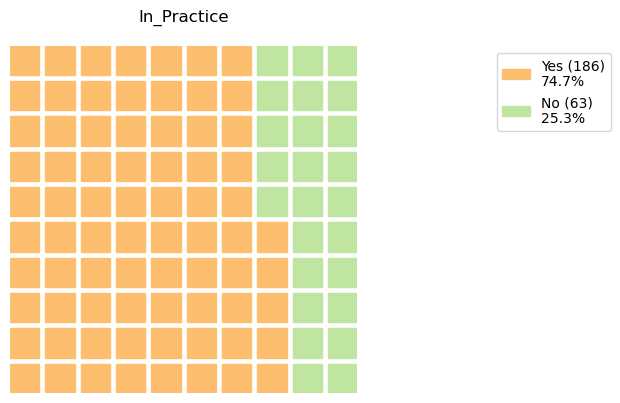

In [8]:
col = 'Have you put into practice things you have learned at image analysis workshops/tutorials? If not, why not?'
df = data.loc[data['In_Practice'] != '']
utils.single_select(df, 'In_Practice', os.path.join('figures','Have_you_put_in_practice.png'),
                  type='waffle')

In [9]:
col = "Are there any conferences you've attended in the past that you think would particularly benefit from the addition/expansion of image analysis offerings?"
for x in data[col].dropna().unique():
    print(x)


The imageSC-Live conference in Gather Town is really usefull. Solve doubts, new ideas, networking, friendship... I guess it would be really nice to do it more often.
ABRF, Microscopy and Micro-analysis
no
I think all of them would benefit from this. Mostly, I think they should be used to encourage investigators to pressure their schools/universities into hiring bioimage analysts. 
Light sheet course in Woods Hole (MBL), several others. 
Microbiology conferences in general
ICOP
I have never attended any conferences related to this field.
-
No Idea
Cilia2024, Microtubules: from atoms to complex systems
Microscopy microscience congress, biotechX
Si 
ELMI
can't say I've thought that way, up to the organizers really
No
Any neuroscience conference, actually any biological field would benefit because users are often unaware and/or untrained in aspects of bioimage analysis 
Yes, SITC, AACR, and NSH
Cell Bio Annual Meeting
Some of the GRC conferences
Yes
I can't think of any particular meeting

In [10]:
col = 'What specific topics (i.e. overviews of a particular tool, comparisons between pieces of software, or how to use a certain tool for a certain kind of experiment) would you like to see prioritized for future image analysis workshop and tutorial offerings?'
for x in data[col].dropna().unique():
    print(x)


Hands-on tutorial on how to use certain softwares. How to use R/python packages to analyze spatial data
Perhaps is too complex, but i would like a "cross platform" tutorial. i.e at the end of the day we have the same problems but we use different softwares based on our preferences. So I guess that something like this coud be interesting: Problem: "I want to segment cells with cellpose" and do a tutorial with FIJI, CellProfiler,  QuPath, Napari and Python. In other cases, do tutorials using the power of the different softwares tooguether for example:   okay I can do this segementation in QuPath, then I export the tiles and mask using this script and I can use Cellprofiler to extract morphological data. This kind of tutorials could be really usefull. 
Python coding for absolute novices. I have no experience with Python coding.
Workflows of "how to do things correctly". E.g. intensity measurement in fluorescence images (a very common usecase) with a specific tool from image aquisition to

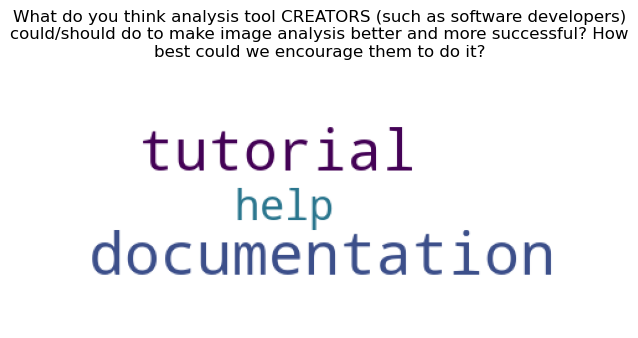

In [11]:
col = 'What do you think analysis tool CREATORS (such as software developers) could/should do to make image analysis better and more successful? How best could we encourage them to do it?'
utils.wordcloud_func(col,['user','users','tools','data','need'],os.path.join('figures','analysis_tool_creators.png'),data,exclude_col_name=True)

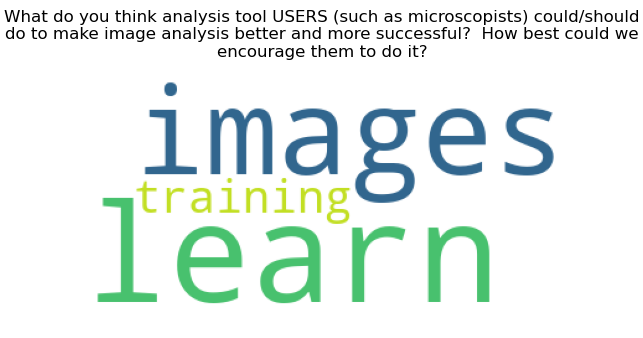

In [12]:
col = 'What do you think analysis tool USERS (such as microscopists) could/should do to make image analysis better and more successful?  How best could we encourage them to do it?'
utils.wordcloud_func(col,['tools','imaging','data'],os.path.join('figures','analysis_tool_users.png'),data,exclude_col_name=True)